In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\winequality-red.csv')

In [3]:
print (df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

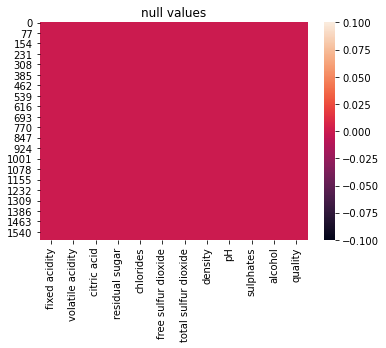

In [6]:
sns.heatmap(df.isnull())
plt.title ('null values')
plt.show()

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

To have a balanced Quality Data, condsidering quality>=6 as good/1 and others as bad/0

In [67]:
wine=df.replace({'quality':{3:0,4:0,5:0,6:1,7:1,8:1}})
wine.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

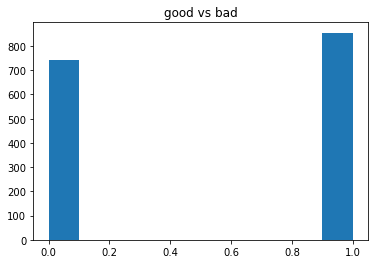

In [9]:
wine['quality'].hist(grid=False)
plt.title('good vs bad')
plt.show()

In [10]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


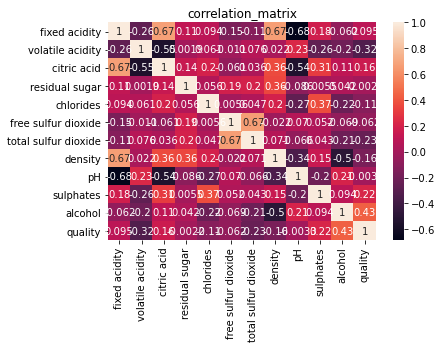

In [11]:
corr_mat=wine.corr()
plt.figure()
sns.heatmap(corr_mat,annot=True)
plt.title('correlation_matrix')
plt.show()

In [12]:
type(corr_mat)

pandas.core.frame.DataFrame

In [13]:
corr_matrix=wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality, dtype: float64

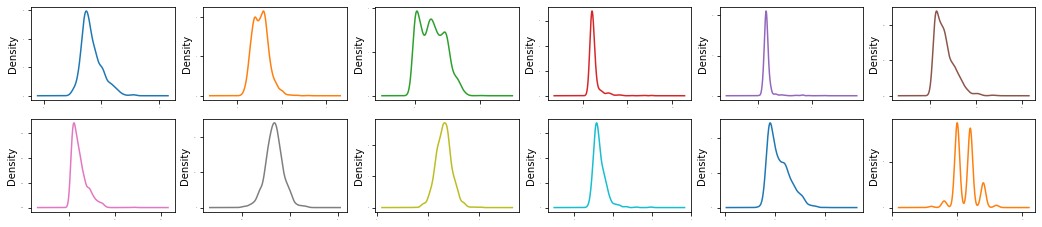

In [14]:
df.plot(kind='density',subplots=True,layout=(6,6),sharex=False,legend=False, fontsize=1,figsize=(18,12))
plt.show()

In [15]:
x=wine.drop("quality",axis=1)
y=wine["quality"]

In [16]:
x.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

In [17]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [18]:
type(x_new)

numpy.ndarray

In [19]:
x=pd.DataFrame(x_new,columns=x.columns)

In [20]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734557
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


In [21]:
x.skew().sort_values(ascending=False)

alcohol                 0.112373
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

In [22]:
sk=x.skew()

In [23]:
sk[np.abs(sk)>0.25].all()

True

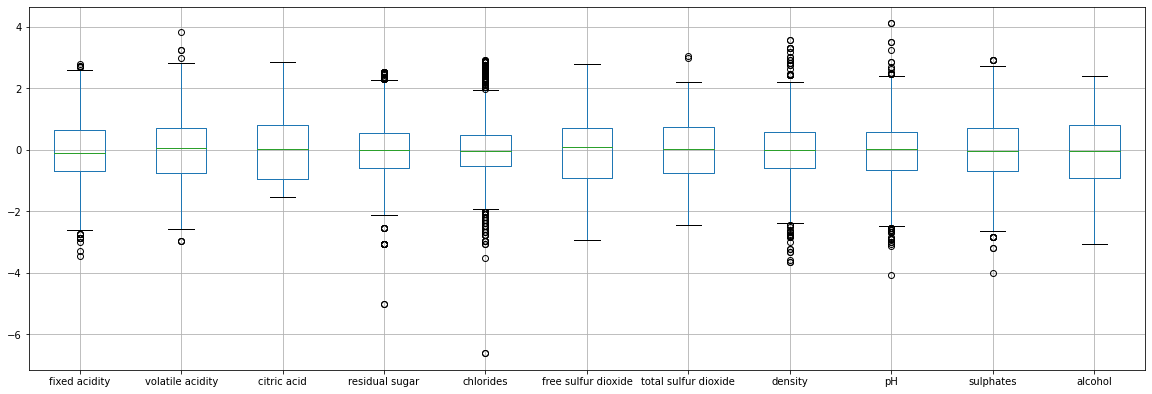

In [24]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [25]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [26]:
new_wine=pd.concat([x,y],axis=1)
new_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,0
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860,0
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,0
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,1
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864,0
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124,1
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734557,1
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800,0


In [27]:
from scipy.stats import zscore
z=np.abs(zscore(new_wine))
new_wine=new_wine[(z<3).all(axis=1)]

In [28]:
x=new_wine.drop("quality",axis=1)
y=new_wine["quality"]

In [29]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734557
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


In [30]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1558, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [32]:
maxAcc=0
maxRS=0

for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.8141025641025641 on Random state 921


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=921)

In [34]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
20,0.501915,-2.039247,1.073347,-0.837193,-0.120630,1.235044,0.693699,0.036967,0.529832,-0.889618,-1.075025
397,1.629618,0.445186,1.514748,0.556565,0.353538,-0.021924,0.399609,1.087075,-0.844397,0.183772,0.734557
450,1.765062,-0.751558,1.882270,0.773887,0.676443,0.385115,-0.083185,1.398351,-1.392800,-0.129955,0.568428
1148,-0.161308,-0.751558,0.813819,-0.380998,0.309847,-0.555712,-0.799912,-0.784925,0.529832,0.256369,1.161982
1092,-0.750316,0.172004,-0.929808,-0.380998,0.079287,-0.405793,-1.171799,-1.038098,0.781494,-0.302088,1.097364
...,...,...,...,...,...,...,...,...,...,...,...
233,-0.831784,0.058263,-0.008132,0.556565,0.079287,-0.405793,-0.003984,0.063456,0.968227,-1.229523,0.734557
1209,-1.461202,-0.751558,0.858073,-0.380998,-0.448846,0.089102,-0.614678,-1.314064,0.906172,1.379169,0.888124
299,-0.831784,0.851851,-1.122699,-0.185690,0.030646,-0.720270,-0.166804,0.904701,2.287418,0.588344,-0.775172
579,1.292981,-1.320459,1.115247,-0.008632,-0.945798,0.473632,0.107498,0.459336,-1.116801,-1.112434,-0.500860


In [35]:
y_train

20      1
397     1
450     1
1148    1
1092    1
       ..
233     0
1209    1
299     0
579     1
1088    1
Name: quality, Length: 1246, dtype: int64

In [36]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1121,-1.088223,-0.058175,-1.531109,-0.837193,-1.013159,0.715350,-0.398904,-1.727728,0.843929,-0.680985,1.553336
1466,-0.516971,-0.177409,0.347272,-0.185690,-1.013159,1.344621,0.540394,0.290762,-0.047962,0.183772,-0.249498
1120,-0.094677,0.172004,0.444255,0.433471,-0.172896,-0.720270,-1.089553,-2.370260,-0.709517,0.649033,1.896465
730,0.808509,0.227895,1.775102,0.152372,2.885367,-0.140581,-0.003984,0.774074,-0.912165,0.326800,-0.775172
1031,-0.516971,0.227895,-1.460818,-0.837193,0.599964,-0.555712,-1.258911,-0.849461,0.275038,-0.392318,0.734557
...,...,...,...,...,...,...,...,...,...,...,...
784,-0.670735,0.445186,-1.460818,0.433471,-0.120630,0.638378,1.204978,0.385646,1.518349,-0.302088,-0.500860
460,0.659438,-0.488441,1.238744,0.152372,0.173993,0.089102,-0.673892,0.459336,0.275038,-0.129955,0.960555
1546,-0.750316,0.337772,-1.391443,-0.380998,-0.391644,0.385115,-0.502887,-0.522146,0.339033,-0.129955,-0.018800
1161,0.447400,-0.361738,0.858073,-2.121200,-0.172896,-0.140581,-0.799912,-0.650705,-0.642404,0.820841,-0.018800


In [37]:
y_test

1121    1
1466    1
1120    1
730     0
1031    1
       ..
784     0
460     1
1546    0
1161    1
344     1
Name: quality, Length: 312, dtype: int64

In [38]:
x_train.shape

(1246, 11)

In [39]:
y_train.shape

(1246,)

In [40]:
x_test.shape

(312, 11)

In [41]:
y_test.shape

(312,)

###Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 81.41025641025641
[[105  31]
 [ 27 149]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       136
           1       0.83      0.85      0.84       176

    accuracy                           0.81       312
   macro avg       0.81      0.81      0.81       312
weighted avg       0.81      0.81      0.81       312



#Decision Tree Classifier 

In [43]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 73.3974358974359
[[ 95  41]
 [ 42 134]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       136
           1       0.77      0.76      0.76       176

    accuracy                           0.73       312
   macro avg       0.73      0.73      0.73       312
weighted avg       0.73      0.73      0.73       312



In [44]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 83.33333333333334
[[110  26]
 [ 26 150]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       136
           1       0.85      0.85      0.85       176

    accuracy                           0.83       312
   macro avg       0.83      0.83      0.83       312
weighted avg       0.83      0.83      0.83       312



In [45]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 81.73076923076923
[[107  29]
 [ 28 148]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       136
           1       0.84      0.84      0.84       176

    accuracy                           0.82       312
   macro avg       0.81      0.81      0.81       312
weighted avg       0.82      0.82      0.82       312



CROSS VALIDATION

In [46]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression Model is",scr1.mean())

Cross validation score of Logistic Regression Model is 0.7208096298128452


In [47]:
scr2=cross_val_score(RF, x, y, cv=5)
print("Cross validation score of Random Forest Classifier is",scr2.mean())

Cross validation score of Random Forest Classifier is 0.7271992744661555


In [48]:
scr3=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier is",scr3.mean())

Cross validation score of Decision Tree Classifier is 0.6456859592711682


We see that the best accuracy is given by Random Forest Classifier

Hyper Parameter Testing

In [56]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy']}

In [57]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 37, 'max_features': 'auto'}

In [58]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8557692307692307

In [59]:
from sklearn.model_selection import RandomizedSearchCV

grid_param={'min_samples_leaf':range(1,50,3),
            'min_samples_split':range(2,50,3),
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy'],
           'splitter':['best','random']}

In [60]:
RCV=GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [61]:
RCV_pred=RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.7403846153846154

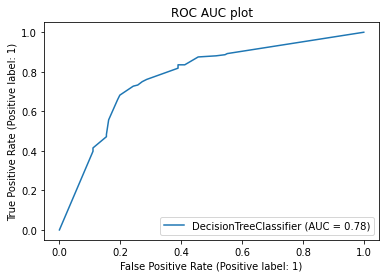

In [62]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

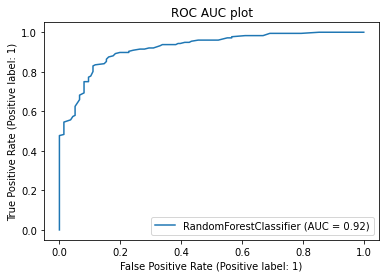

In [63]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

Final accuracy is 83.3% and AUC accuracy is 92% using the Random Forest Classifier

In [64]:
import joblib
joblib.dump(GCV.best_estimator_,"wine_quality.pkl")

['wine_quality.pkl']